<a href="https://colab.research.google.com/github/susmittha21/PROJECT1_Sales_Analysis-/blob/main/PROJECT1_SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES DATA EDA PROJECT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
import pandas as pd

# METHOD 1 : URL
#url = 'https://www.kaggle.com/datasets/vivek468/superstore-dataset-final'
#df = pd.read_csv(url, encoding='ISO-8859-1')  # Important: This encoding handles special characters

# METHOD 2: FILE SELECTOR
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')

# DETAILS
print(f"Dataset shape: {df.shape}")
print(df.head())
print(df.info())

Saving Sample - Superstore.csv to Sample - Superstore.csv
Dataset shape: (9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal

In [4]:
df.isnull().sum() # ZERO FOR EVERYTGING AS NO NULL VALUES


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


#-IF MISSING VALUES PRESENT- Handle Missing Data
#### Example: drop rows with any missing values
df = df.dropna()


Or you can fill missing data:


df['Sales'] = df['Sales'].fillna(0)

#-Fix Data Types (especially dates)

In [46]:
#df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') # here as in the dataset both type of date formats where present
#print('shows any failed changes')
#df[df['Order Date'].isna()]
#df["Order Date"].head(50)
#df["Order Date"].head(50).isna()    MISSING VALUES - NaN (FOR NUMERIC VALUES) & NaT (FOR DATETIME)





In [31]:
df['Order Date'].isna().sum() #TO COUNT NUMBER OF NAT VALUES IN ORDER DATE


np.int64(5952)

In [49]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower() # FOR CLEAN COLUMN NAMES WITHOUT ANY SPACES
print(df.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'order_date',
       'order_date_yyyy_mm_dd'],
      dtype='object')


In [50]:
df['category'].value_counts()

,count
category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [51]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print(region_sales) # TOTAL SALES BY REGION

region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64


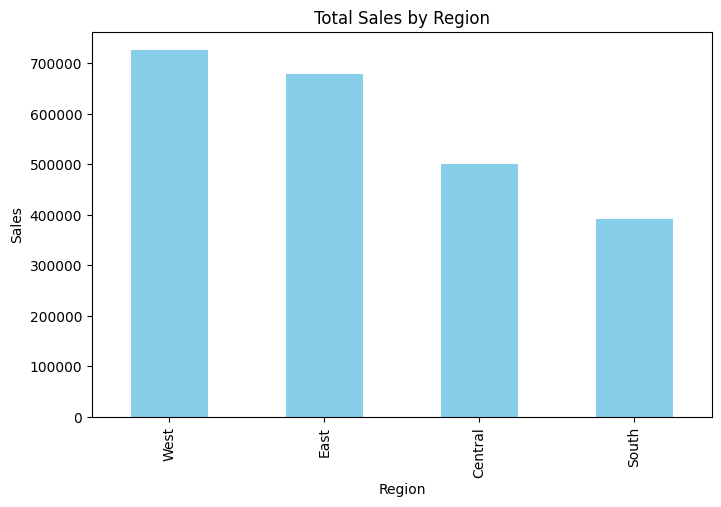

In [52]:
#PLOT GRAPH SIMPLE BAR GRAPH
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()